# 패키지 불러오기

In [0]:
# 패키지 불러오기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

## Convolution을 사용하는 이유: Filter를 사용하여 특성을 추출 할 수 있다.

##Filter수를 적절하게 늘리면 특성 표현이 더 정확해 지며 loss가 줄고 acc가 오를 수 있다.

#### ex) 눈 주변을 보고 사람의 눈임을 인식할 수 있다(Feature map)

##### **Sequential모델**: 네트워크에서 Input과 Output이 1개인 보델로 층을 차례대로 쌓는 모델

##### **Dense**: 네트워크에서 가장 기본적으로 이용되는 층이며 입력층과 출력층을 연결 시켜 준다

##### **Conv2D**: 이미지에서 Filter를 이용하여 주요 특성을 뽑아내어 새로운 2차원 데이터를 만든다

##### **MaxPooling2D**: 레이어의 출력 이미지에서 주요한 값만을 뽑아 지역적인 사소한 변화가 영향을 주지 않도록 한다

##### **Flatten**: Conv2D와 MaxPooling2D를 거쳐 만들어진 2차원 데이터를 Dense층에 연결 하기 위하여 1차원 데이터로 변경



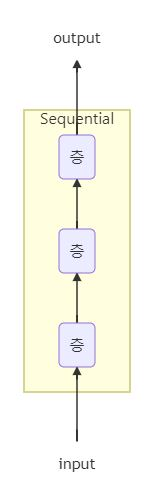

In [4]:
from IPython.display import Image


Image('/content/1.JPG')

# ImageDataGenerator 이용한 이미지 생성

##### ImageDataGenerator를 사용하는 이유
사진을 읽은후
JPEG 콘텐츠를 RGB 픽셀값으로 디코딩하고

부동소수 타입의 텐서로 변환합니다
또한 픽셀 값 (0~255)의 스케일을 [0,1]로 값을 조정할 수 있습니다

신경망은 작은 입력값으로 전처리 되어야 한다

In [0]:
# 랜덤시드 고정

np.random.seed(3)

# 데이터 생성

# generator로 호출 된 함수는 flow_from_directory
# 3종류의 이미지를 분류하는 것이기 때문에 batch_size는 3
# 다중 클래스 분류 문제이기 때문에 @D one-hot 부호화 된 라벨이 반환되는 class_mode='categorical'이 들어간다

train_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_image=(50,50),
    batch_size=3,
    class_mode='categorical'
)

validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(50,50),
    batch_size=3,
    class_mode='categorical'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(50,50),
    batch_size=3,
    class_mode='categorical'
)

# 모델 구성

In [9]:
model=Sequential()


model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(50,50,3)))  # Conv2D Filter수32개,kernel=(3,3),input 이미지는 RGB의 50*50
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               5120128   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 5,139,907
Trainable params: 5,139,907
Non-trainable params: 0
____________________________________________

### relu:sigmoid 함수는 학습을 할수록 가중치가 0에 가까워 지기 때문에 학습이 잘 안되는 현상이 발생하므로 Hidden layer에 relu 함수가 자주 사용된다

### softmax: 다중 분류 문제에서 출력층에서 확률이 가장 높은 Class가 출력이 된다

# 모델 학습

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# loss는 train data에서 올바른 방법으로 학습하도록 학습하도록 도와준다
# optimizer는 loss를 줄이기위한 backpropagation weight를 주어 loss를 줄이고 acc를 높이고자 한다.
# 최적화된 weight를 찾는것 이다

# 모델 학습시키기

In [13]:
# train image 개수 10233개 validation image 개수 200장 test image 200장

hist=model.fit_generator(
    train_generator,
    steps_per_epoch=3411,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=200
)

# 모델평가

print('------Evaluate--------')
scores=model.evaluate_generator(test_generator,steps=200)

print('%s:%.2f%%' %(model.metrics_names[1],scores[1]*100))

NameError: ignored